In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt


### Custom Libraries
import datasets
import models
import lib
import train

In [2]:
# Hyperparameters
batch_size = num_noise = 64

# standardization code
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), ])
TrainDataLoaders = []
TestDataLoaders  = []

for i in range(5):
    # MNIST dataset
    TrainDataSet = datasets.MNIST_IncrementalDataset(source='data/', 
                                            train=True, 
                                            transform=transform, 
                                            download=True, 
                                            classes=range(i * 2, (i+1) * 2))
    TestDataSet = datasets.MNIST_IncrementalDataset(source='data/', 
                                           train=False, 
                                           transform=transform, 
                                           download=True, 
                                           classes=range(i * 2, (i+1) * 2))

    TrainDataLoaders.append(torch.utils.data.DataLoader(TrainDataSet, 
                                                        batch_size=batch_size, 
                                                        shuffle=True))
    TestDataLoaders.append(torch.utils.data.DataLoader(TestDataSet, 
                                                       batch_size=batch_size, 
                                                       shuffle=False))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


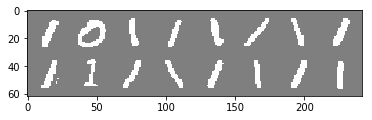

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


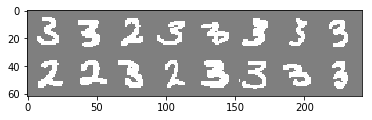

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


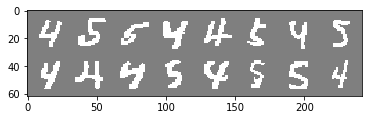

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


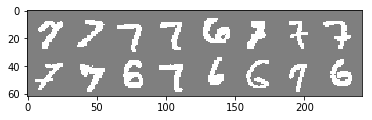

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


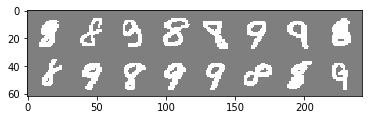

In [3]:
for i in range(5):
    example_mini_batch_img, example_mini_batch_label  = next(iter(TrainDataLoaders[i]))
    lib.imshow_grid(example_mini_batch_img[0:16,:,:].view(16, -1, 28, 28))

(Epoch 9/100) p_real: 0.2108205946445465 | p_fake: 0.21759690551757807



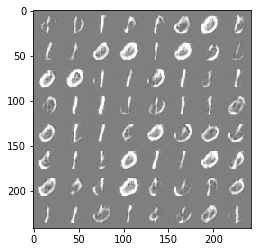

(Epoch 19/100) p_real: 0.21149999999999988 | p_fake: 8.856285180022837e-20



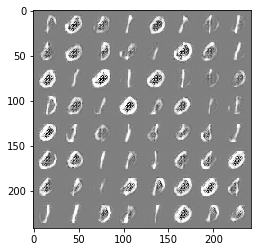

(Epoch 29/100) p_real: 0.21149999999999988 | p_fake: 8.91287480602802e-20



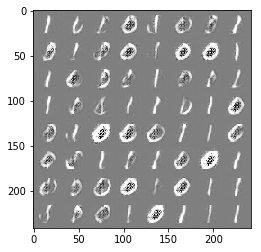

(Epoch 39/100) p_real: 0.21149999999999988 | p_fake: 9.083683400442708e-20



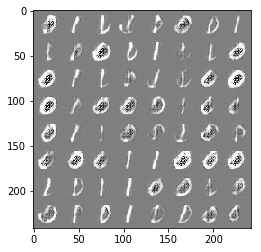

(Epoch 49/100) p_real: 0.21149999999999988 | p_fake: 9.494940792694024e-20



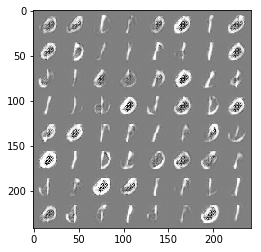

(Epoch 59/100) p_real: 0.21149999999999988 | p_fake: 1.0488396752119928e-19



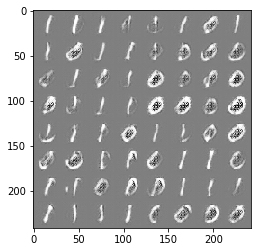

(Epoch 69/100) p_real: 0.21149999999999988 | p_fake: 1.2286235101451266e-19



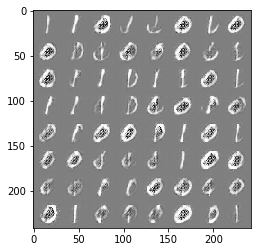

(Epoch 79/100) p_real: 0.21149999999999988 | p_fake: 1.5064211471474164e-19



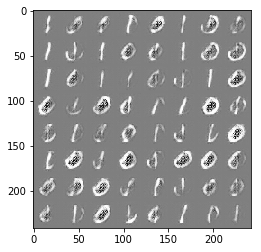

(Epoch 89/100) p_real: 0.21149999999999988 | p_fake: 1.933745844509475e-19



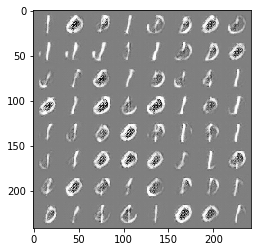

(Epoch 99/100) p_real: 0.21149999999999988 | p_fake: 2.619662815216852e-19



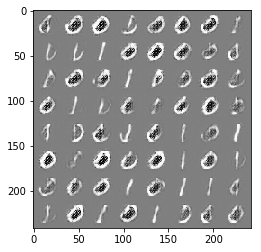

Task 1 solver's loss: 0.9999460577964783



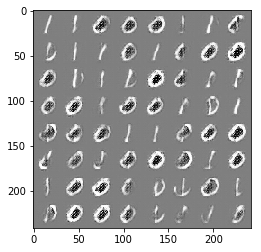

RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 4 and 3 at /pytorch/aten/src/THC/generic/THCTensorMath.cu:62

In [4]:
ratio = 0.5
epochs = 100
gan_p_real_list = []
gan_p_fake_list = []
solver_loss_list = []
pre_gen = None
pre_solver = None

for i in range(5):
    if i > 0:
        pre_gen = gen
        pre_solver = solver

    gen = models.Generator(num_noise)
    disc = models.Discriminator()
    solver = models.Solver(i+1)
    train.train(cur_task = i, 
                gen = gen, 
                disc = disc, 
                solver = solver, 
                pre_gen = pre_gen, 
                pre_solver = pre_solver, 
                ratio = ratio, 
                epochs = epochs,
                batch_size = batch_size,
                num_noise = num_noise,
                TrainDataLoaders = TrainDataLoaders,
                TestDataLoaders = TestDataLoaders)
    
    solver_loss = lib.solver_evaluate(i, gen, solver, ratio, TestDataLoaders)
    
    solver_loss_list.append(solver_loss)
    print("Task {} solver's loss: {}\n".format(i+1, solver_loss))
    images = gen(lib.sample_noise(batch_size, num_noise))
    lib.imshow_grid(images)